# Example 5.3 (Constructing a confidence ellipse for $\mu$)

In [1]:
import pathlib
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Ellipse

In [2]:
def load_data() -> pd.DataFrame:
    """
    Load the microwave radiation data from Example 5.3 and Example 5.4.
    """
    closed_pth = pathlib.Path('..\..\data\Table4.1.xlsx')
    closed_df = pd.read_excel(closed_pth, names=['Oven', 'ClosedRadiation'])

    open_pth = pathlib.Path('..\..\data\Table4.5.xlsx')
    open_df = pd.read_excel(open_pth, names=['Oven', 'OpenRadiation'])

    return closed_df.merge(open_df).set_index('Oven')**(1/4)



In [3]:
radiation_df = load_data()
radiation_df.head(3)

,ClosedRadiation,OpenRadiation
Oven,,
1,0.622333,0.740083
2,0.547723,0.547723
3,0.651356,0.740083


In [4]:
def plot_confidence_ellipse(df: pd.DataFrame, alpha: float):
    xbar = np.mean(df, axis=0).to_numpy()
    n, p = df.shape

    eigenvalues, eigenvectors = np.linalg.eig(np.cov(df.T))
    max_idx, min_idx = np.argmax(eigenvalues), np.argmin(eigenvalues)
    lmbda1, lmbda2 = eigenvalues[max_idx], eigenvalues[min_idx]
    e1, e2 = eigenvectors[:, max_idx].copy(), eigenvectors[:, min_idx].copy()

    const = (p*(n - 1))/(n*(n - p))
    f_val = scipy.stats.f.ppf(1-alpha,p,n-p)

    if np.all(e1 < 0):
        e1 = e1*(-1)

    ell_width = np.sqrt(lmbda1)*np.sqrt(const*f_val)
    ell_height = np.sqrt(lmbda2)*np.sqrt(const*f_val)
    ell_angle = np.arccos(e1[1])*(180/np.pi)

    plt.figure()
    ax = plt.gca()
    ellipse = Ellipse(xy=xbar,
                      width=2*ell_width,
                      height=2*ell_height,
                      angle=ell_angle,
                      fill=False)
    ax.add_patch(ellipse)
    for i in [-1, 1]:
        plt.quiver(xbar[0],
                xbar[1],
                e1[0] * ell_width * i,
                e1[1] * ell_width * i,
                angles='xy',
                scale_units='xy',
                scale=1
                )
        plt.quiver(xbar[0],
                xbar[1],
                e2[0] * ell_height * i,
                e2[1] * ell_height * i,
                angles='xy',
                scale_units='xy',
                scale=1)
    return plt, ax

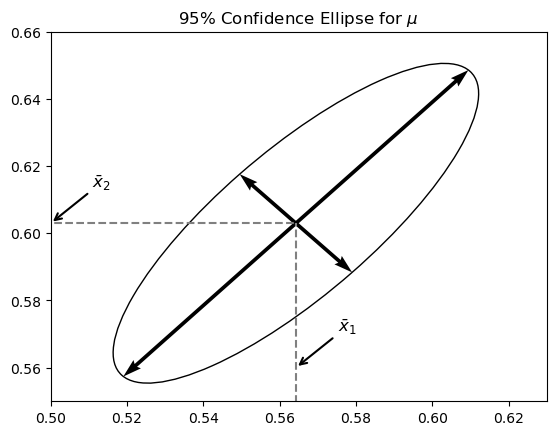

In [5]:
xbar = np.mean(radiation_df, axis=0)
my_plot, ax = plot_confidence_ellipse(radiation_df, alpha=0.05)
ax.set_title('95% Confidence Ellipse for $\mu$')
my_plot.xlim([0.50, 0.63])
my_plot.ylim([0.55, 0.66])

# Draw dashed lines at the mean.
ax.plot([xbar[0], xbar[0]], [0, xbar[1]], linestyle='--', color='gray')
ax.plot([0, xbar[0]], [xbar[1], xbar[1]], linestyle='--', color='gray')

# Label mean with arrows.
ax.annotate(r'$\bar{x}_{1}$', (xbar[0], 0.56), xytext=(30, 26),
                textcoords='offset points', fontsize=12, 
                arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(r'$\bar{x}_{2}$', (0.50, xbar[1]), xytext=(30, 26),
                textcoords='offset points', fontsize=12, 
                arrowprops=dict(arrowstyle="->", lw=1.5))

my_plot.show()